## Predição de Turnover (Rotatividade) de Funcionários com Machine Learning

📁 **Etapas Realizadas:**

**1.** Leitura e Exploração Inicial dos Dados

**2.** Limpeza e Preparação dos Dados

**3.** Análise Exploratória (EDA)

**4.** Modelagem Preditiva

**5.** Avaliação dos Modelos

**6.** Explicação com SHAP

**7.** Relatório/Apresentação de Resultados

---


### Objetivo da Análise:

Construir um modelo preditivo que identifique padrões de rotatividade (attrition) e oferecer recomedações ao RH da empresa para ações preventivas.

### Perguntas Norteadoras:

- Quais características mais influenciam na rotatividade de funcionários?

- Qual perfil de colaborador tem maior propensão a sair da empresa?

- Um modelo de ML pode prever com boa precisão a saída de um funcionário?

- Que ações a empresa pode tomar com base nessas previsões?

---

⚙️ **Dataset Utilizado:** [Kaggle - IBM HR Analytics Attrition & Performance](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset/data)

🛠️ **Ferramentas Utilizadas:** Pandas, Numpy, Matplotlib, Seaborn, Scikit-learn, XGBoost, Jupyter Notebook (VSCode)

---

### 🔹Etapa 1 – Leitura e Exploração Inicial dos Dados
**Objetivo:**

Nesta etapa, será carregado o conjunto de dados para obter uma visão geral sobre suas características:

- Conhecer as variáveis disponíveis

- Identificar a variável alvo

- Investigar a estrutura e integridade dos dados

- Fazer as primeiras observações sobre possíveis padrões ou problemas

### 1.1 Importando bibliotecas

In [204]:
# importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math 
import shap
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from xgboost import plot_importance, XGBClassifier

### 1.2 Importando dataset e explorando os dados iniciais

In [205]:
# importando dataset e lendo as primeiras linhas
df = pd.read_csv('data/rh_dataset.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [206]:
# verificando total de linhas e colunas
df.shape

(1470, 35)

In [207]:
# verificando os nomes de todas as colunas disponíveis
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

O dataset possui 35 colunas, onde temos variáveis categóricas e numéricas. Destas, só irei selecionar as que forem pertinentes à análise.

In [208]:
# verificando se existem valores ausentes
df_tratado = df.isnull().sum()
df_tratado = df.copy()
df_tratado

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


Verifica-se que não existem valores nulos no dataset.

### 🔹 Etapa 2 – Limpeza e Preparação dos Dados
**Objetivo:** Preparar os dados para a modelagem:

- Transformações nas variáveis

- Codificação de variáveis categóricas

- Conversão da variável-alvo em binária

- Análise de colunas redundantes ou inúteis

- Eventualmente, normalização/escalonamento

### 2.1 Removendo colunas irrelevantes

In [209]:
# removendo colunas irrelevantes para a análise
df_tratado.drop(['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'], axis=1, inplace=True)

Por que remover essas colunas?

```EmployeeCount```: é constante (valor 1 para todos);

```Over18```: todos os funcionários têm mais de 18 anos;

```StandardHours```: também é constante;

```EmployeeNumber```: apenas um identificador único (não tem valor preditivo).

### 2.2 Codificação de variáveis categóricas:

In [210]:
# codificação binária
df_tratado['Attrition'] = df_tratado['Attrition'].map({'Yes' : 1, 'No' : 0})
df_tratado['Gender'] = df_tratado['Gender'].map({'Male': 1, 'Female': 0})
df_tratado['OverTime'] = df_tratado['OverTime'].map({'Yes': 1, 'No': 0})

In [211]:
# one-hot encoding
df_tratado = pd.get_dummies(df_tratado, columns=[
    'BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus'
], drop_first=True)

In [212]:
# separando as variáveis numéricas para dimensionamento
num_cols = df_tratado.select_dtypes(include=['int64', 'float64']).drop('Attrition', axis=1).columns

### 2.3 Definindo features e target

In [213]:
# definindo a variável alvo (y) e variável preditora (X)
X = df_tratado.drop('Attrition', axis=1)
y = df_tratado['Attrition']

### 2.4 Dimensionando features numéricas

In [214]:
# normalizando as variáveis numéricas
scaler = StandardScaler()
df_tratado[num_cols] = scaler.fit_transform(df_tratado[num_cols])

In [168]:
# veriricando se tudo está numérico e dimensões de X e y
print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')
print(X.dtypes.unique())

X shape: (1470, 44)
y shape: (1470,)
[dtype('int64') dtype('bool')]


In [215]:
# salvando os dados tratados
df_tratado.to_csv('dados_tratados.csv', index=False)
print('Dataset salvo com sucesso!')

Dataset salvo com sucesso!


### 🔹 Etapa 3 – Análise Exploratória dos Dados (EDA)
**Objetivo:** 

Investigar o comportamento das variáveis, entender padrões, relações com a variável alvo (Attrition) e descobrir insights que possam ajudar na modelagem e nas recomendações.

### 3.1 Entendendo a variável alvo (target) da análise:

Para o objetivo de análise desse projeto, a variável alvo é 'Attrition', que identifica a rotatividade na empresa.

Attrition
0    83.877551
1    16.122449
Name: proportion, dtype: float64

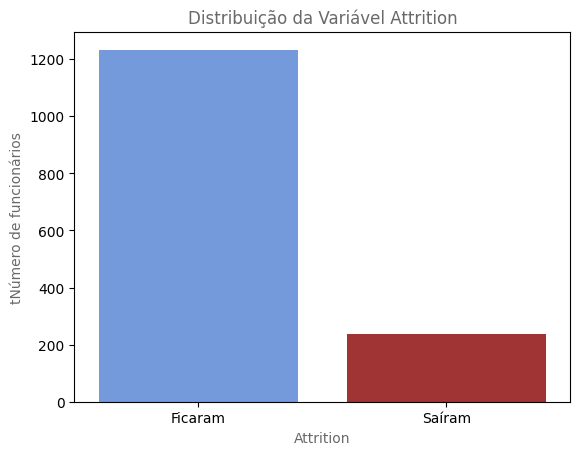

In [216]:
# análise gráfica da variável alvo
colors = ['cornflowerblue', 'firebrick']
sns.countplot(x='Attrition', data=df_tratado, hue='Attrition', legend=False, palette=colors)
plt.title('Distribuição da Variável Attrition', color='dimgrey')
plt.xlabel('Attrition', color='dimgrey')
plt.ylabel('tNúmero de funcionários', color='dimgrey')
plt.xticks([0,1], ['Ficaram', 'Saíram'])

# verificando a proporção de attrition
df_tratado['Attrition'].value_counts(normalize=True) * 100

### 3.2 Correlação das variáveis com *Attrition*

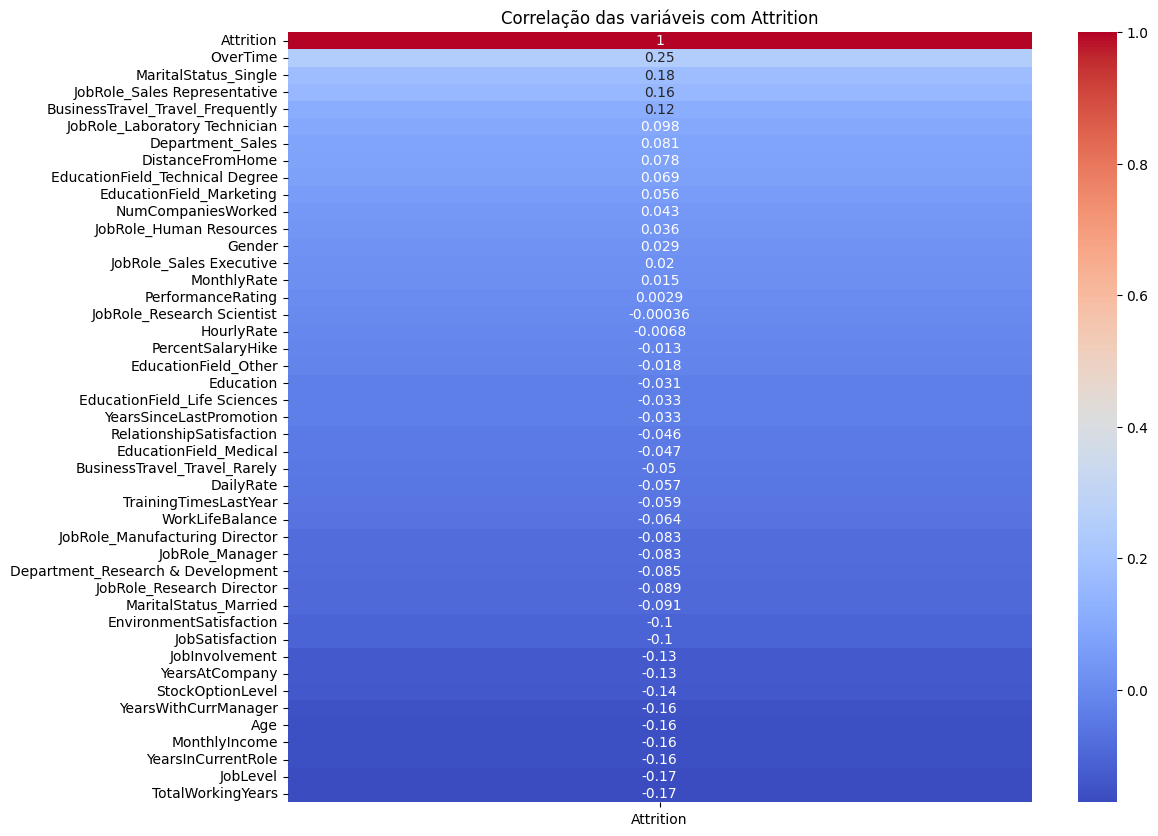

Correlações Positivas com Attrition:
 OverTime                            0.246118
MaritalStatus_Single                0.175419
JobRole_Sales Representative        0.157234
BusinessTravel_Travel_Frequently    0.115143
JobRole_Laboratory Technician       0.098290
Name: Attrition, dtype: float64

Correlações Negativas com Attrition:
 Age                  -0.159205
MonthlyIncome        -0.159840
YearsInCurrentRole   -0.160545
JobLevel             -0.169105
TotalWorkingYears    -0.171063
Name: Attrition, dtype: float64


In [217]:
# matriz de correlação das variáveis com attrition
corr = df_tratado.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr[['Attrition']].sort_values(by='Attrition', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlação das variáveis com Attrition')
plt.show()
plt.close()

# top 5 correlações de variáveis com attrition
corr_target = corr['Attrition'].drop('Attrition').sort_values(ascending=False)
print("Correlações Positivas com Attrition:\n", corr_target.head())
print("\nCorrelações Negativas com Attrition:\n", corr_target.tail())

### 3.3 Distribuição das variáveis numéricas por *Attrition*

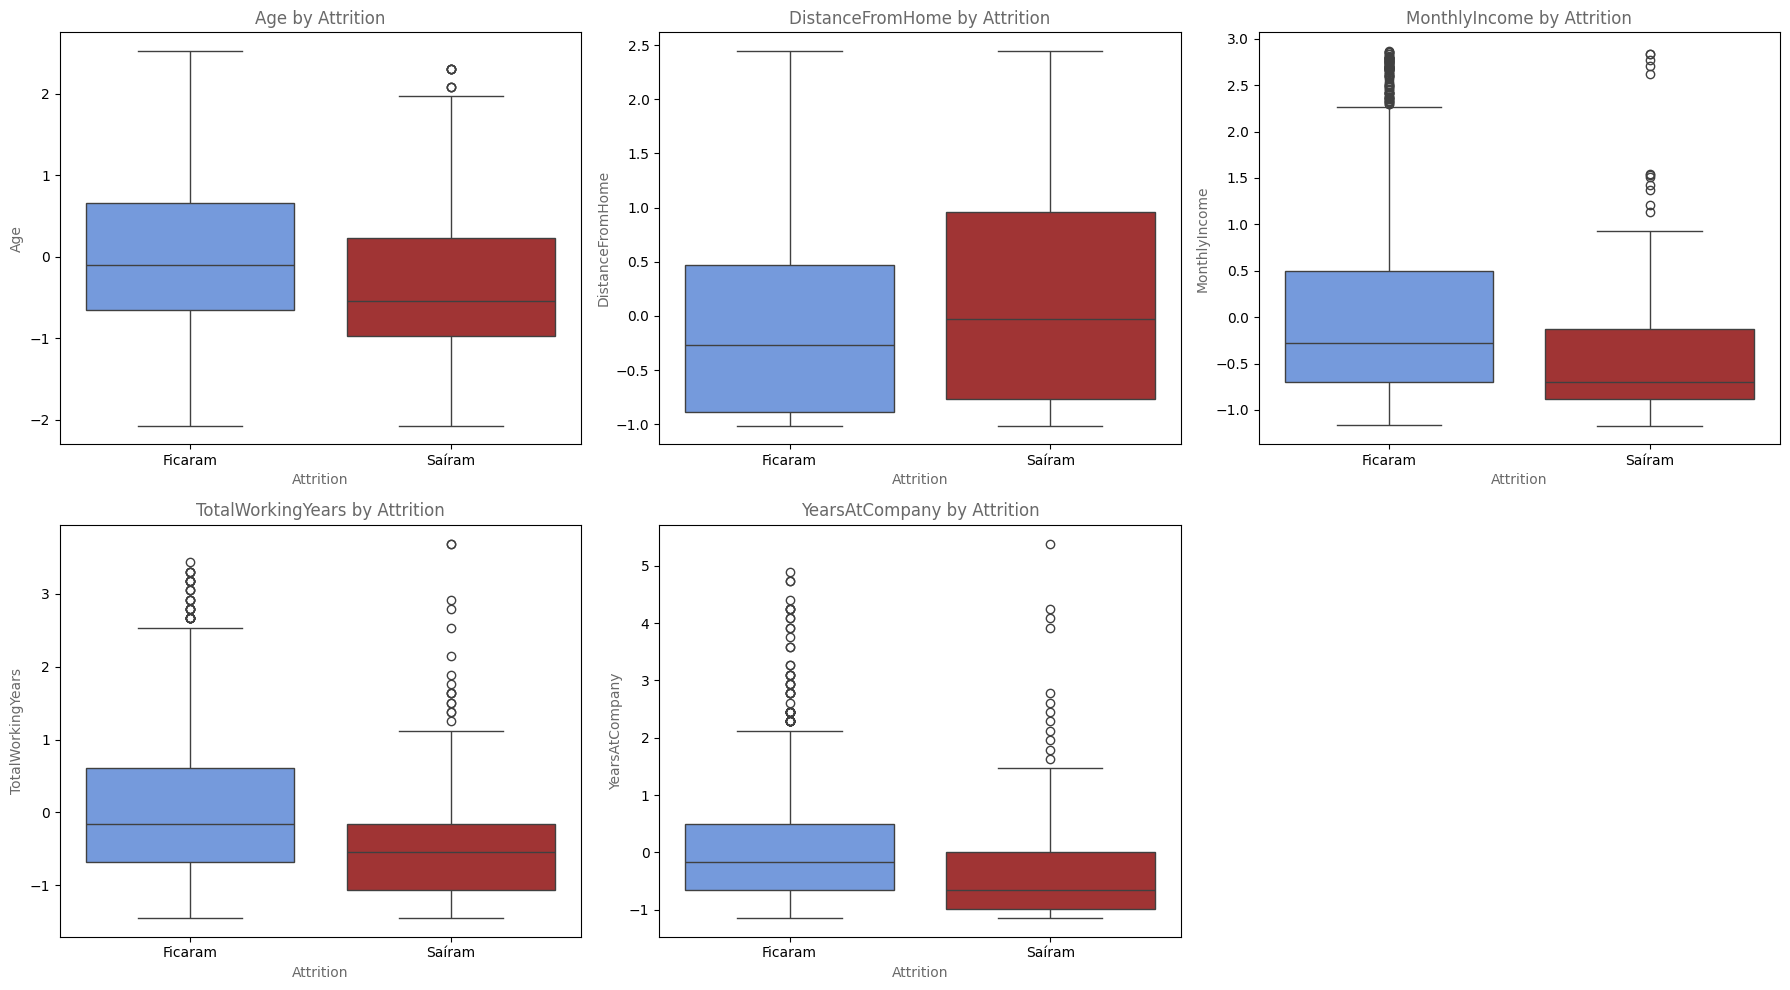

In [218]:
# boxplots
features = ['Age', 'DistanceFromHome', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany']

colors = ['cornflowerblue', 'firebrick']
n_cols = 3
n_vars = len(features)
n_rows = math.ceil(n_vars / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()

for i, num in enumerate(features):
    sns.boxplot(x='Attrition', y=num, hue='Attrition', palette=colors, data=df_tratado, legend=False, ax=axes[i])
    axes[i].set_title(f'{num} by Attrition', color='dimgrey')
    axes[i].set_xlabel('Attrition', color='dimgrey')
    axes[i].set_ylabel(num, color='dimgrey')
    axes[i].set_xticks([0,1])
    axes[i].set_xticklabels(['Ficaram', 'Saíram'])

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
plt.close()

### 3.4 Distribuição das variáveis categórias por *Attrition*

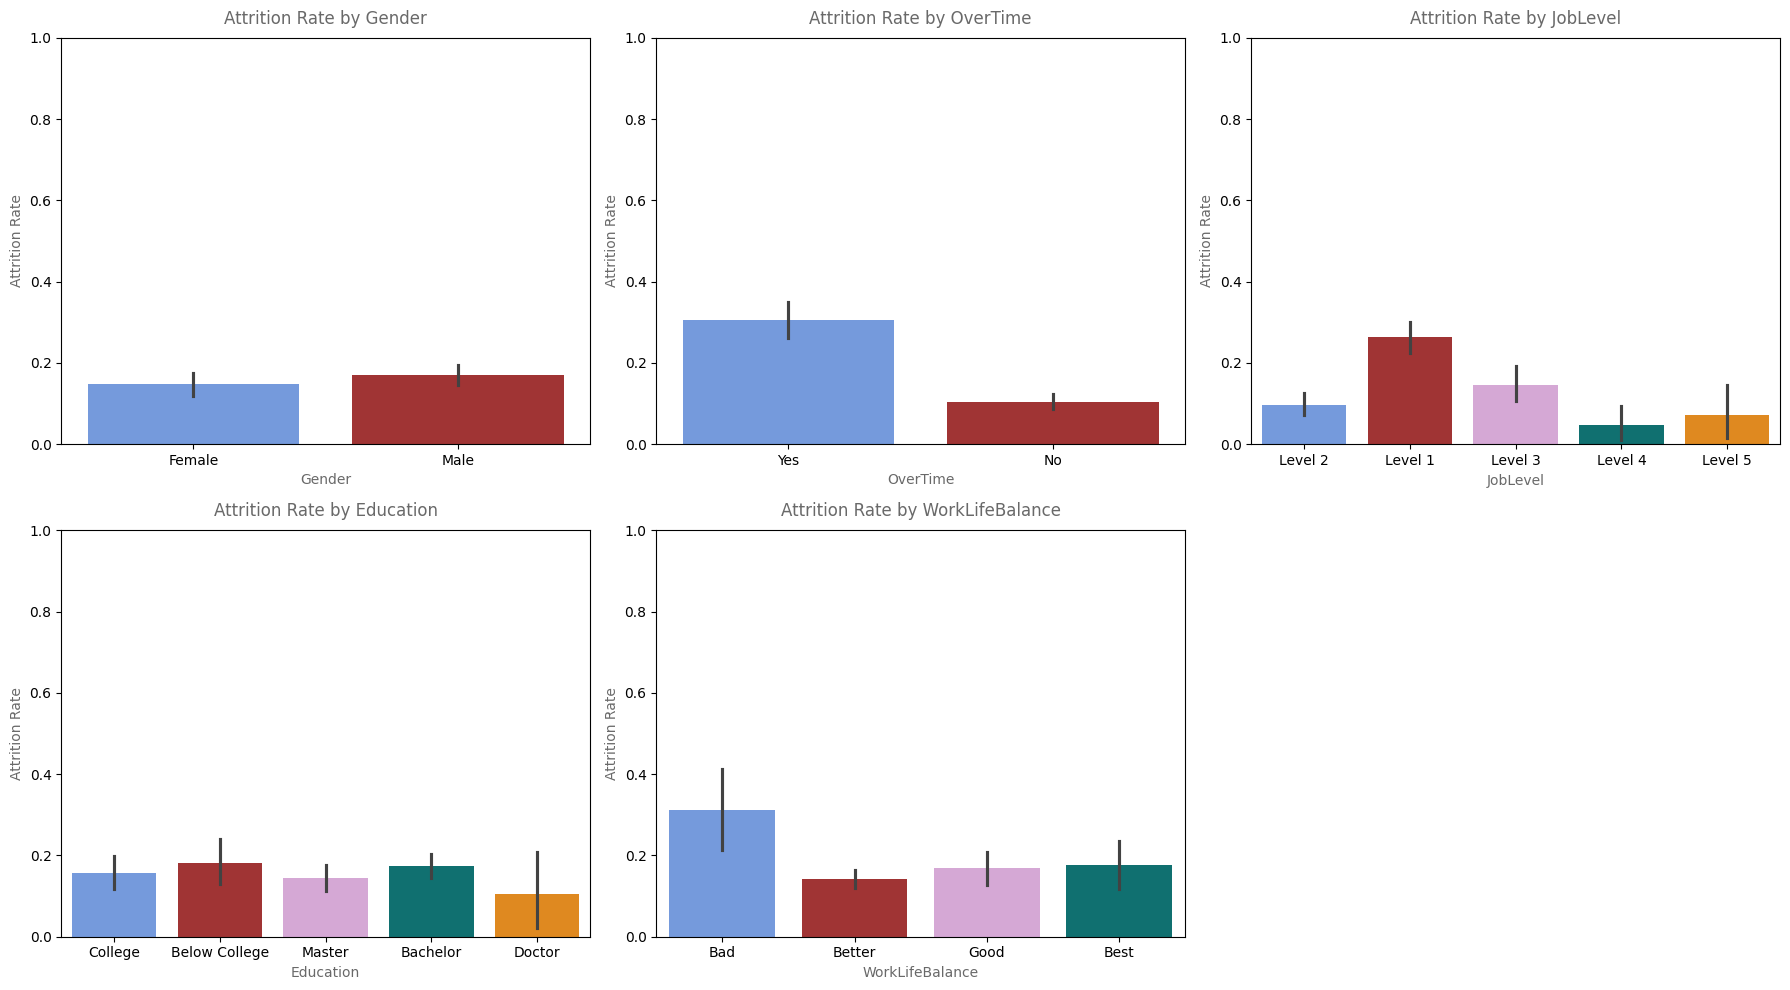

In [233]:
# mapeando as variáveis
education_map = {
    1: 'Below College',
    2: 'College',
    3: 'Bachelor',
    4: 'Master',
    5: 'Doctor'
}

joblevel_map = {
    1: 'Level 1',
    2: 'Level 2',
    3: 'Level 3',
    4: 'Level 4',
    5: 'Level 5'
}

worklife_map = {
    1: 'Bad',
    2: 'Good',
    3: 'Better',
    4: 'Best'
}

# aplicando copy para a visualização
viz_data = df.copy()

# aplicando o mapping
viz_data['Education'] = viz_data['Education'].map(education_map)
viz_data['JobLevel'] = viz_data['JobLevel'].map(joblevel_map)
viz_data['WorkLifeBalance'] = viz_data['WorkLifeBalance'].map(worklife_map)
viz_data['Attrition'] = viz_data['Attrition'].map({'Yes' : 1, 'No': 0})

# gráficos de barra
categorical = ['Gender', 'OverTime', 'JobLevel', 'Education', 'WorkLifeBalance']
colors = ['cornflowerblue', 'firebrick', 'plum', 'teal', 'darkorange']

# Define layout: 3 gráficos por linha
n_cols = 3
n_vars = len(categorical)
n_rows = math.ceil(n_vars / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(categorical):
    n_classes = viz_data[col].nunique()
    sns.barplot(
        x=col,
        y='Attrition',
        hue=col,
        palette=colors[:n_classes],
        data=viz_data,
        ax=axes[i]
    )
    axes[i].set_title(f'Attrition Rate by {col}', pad=10, color='dimgrey')
    axes[i].set_ylabel('Attrition Rate', color='dimgrey')
    axes[i].set_xlabel(col, color='dimgrey')
    axes[i].set_ylim(0, 1)

# Remove subplots vazios (se houver)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### 3.5 Insights

- **Proporção de *Attrition*:** Aproximadamente 16% dos funcionários saíram da empresa. Nota-se que existem um desbalanceamento entre as duas classes. Sendo a proporção de 'não' maior do que a de 'sim', que seria a classe que queremos avaliar. Será então necessário utilizar técnicas de balanceamento posteriormente.

- **Principais fatores correlacionados com *Attritrion*:** 

    ```OverTime``` (correlação positiva)

    ```TotalWorkingYears``` (correlação negativa)

   ```JobLevel``` (correlação negativa)

    ```MaritalStatus_Single``` (correlação positiva)

    ```YearsInCurrentRole``` (correlação negativa)


- **Funcionários com tendência a sair:** Funcionários que fazem mais horas extras, mais jovens, com salários mais baixos, menos tempo de experiência e com menos tempo na empresa.

### 🔹Etapa 4 – Modelagem Preditiva
**Objetivos:**

- Treinar pelo menos dois modelos supervisionados

- Realizar tuning de hiperparâmetros

- Comparar os modelos com base em métricas de classificação

### 4.1 Separando os dados

In [234]:
# separando dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### 4.2 Treinando os Modelos:

**Regressão Logística:**

In [235]:
# criar pipeline com escalonamento
pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(max_iter=1000, class_weight='balanced'))
])

pipeline_lr.fit(X_train, y_train)
y_pred_lr = pipeline_lr.predict(X_test)

**XGBoost:**

In [236]:
xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=4,
    random_state=42,
    eval_metric='logloss'
)

xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

### 4.3 Avaliação dos Modelos Básicos:

Resultados do modelo: Regressão Logística
              precision    recall  f1-score   support

           0       0.91      0.78      0.84       247
           1       0.35      0.62      0.44        47

    accuracy                           0.75       294
   macro avg       0.63      0.70      0.64       294
weighted avg       0.82      0.75      0.78       294

Regressão Logística - Matriz de Confusão:


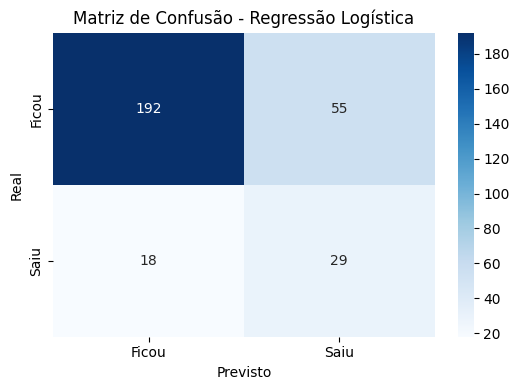

Resultados do modelo: XGBoost
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       247
           1       0.62      0.21      0.32        47

    accuracy                           0.85       294
   macro avg       0.75      0.59      0.62       294
weighted avg       0.83      0.85      0.82       294


Regressão Logística - XGBoost:


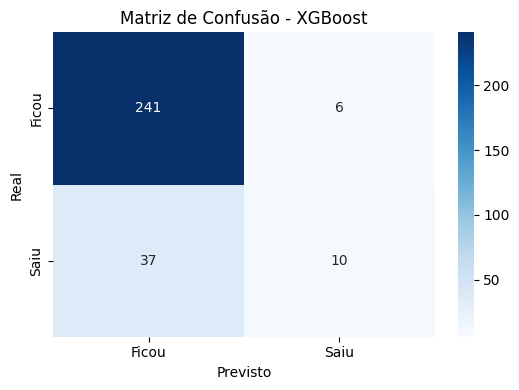

In [261]:
# regressão logística
y_pred_lr = pipeline_lr.predict(X_test)
print(f'Resultados do modelo: Regressão Logística')
print(classification_report(y_test, y_pred_lr))

# matriz de confusão - regressão logística
cm_lr = confusion_matrix(y_test, pipeline_lr.predict(X_test))
tn, fp, fn, tp = cm_lr.ravel()

# MATRIZ REGRESSÃO LOGÍSTICA
print(f'Regressão Logística - Matriz de Confusão:')
plt.figure(figsize=(5.5, 4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['Ficou', 'Saiu'], yticklabels=['Ficou', 'Saiu'])
plt.title('Matriz de Confusão - Regressão Logística')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.tight_layout()
plt.show()

# XGBoost
y_pred_xgb = xgb_model.predict(X_test)
print(f'Resultados do modelo: XGBoost')
print(classification_report(y_test, y_pred_xgb))

# matriz de confusão - xgboost
cm_xgb = confusion_matrix(y_test, xgb_model.predict(X_test))
tn, fp, fn, tp = cm_xgb.ravel()

# MATRIZ XGBOOST
print(f'\nRegressão Logística - XGBoost:')
plt.figure(figsize=(5.5, 4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Ficou', 'Saiu'], yticklabels=['Ficou', 'Saiu'])
plt.title('Matriz de Confusão - XGBoost')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.tight_layout()
plt.show()



### 4.4 Treinando os Modelos com Tuning de Hiperparâmetros

**Regressão Logística com Tuning:**

Melhores parâmetros - Regressão Logística:
{'model__C': 1, 'model__penalty': 'l2', 'model__solver': 'lbfgs'}
Resultados do modelo: Regressão Logística
              precision    recall  f1-score   support

           0       0.91      0.78      0.84       247
           1       0.35      0.62      0.44        47

    accuracy                           0.75       294
   macro avg       0.63      0.70      0.64       294
weighted avg       0.82      0.75      0.78       294

Regressão Logística Tuning - Matriz de Confusão:


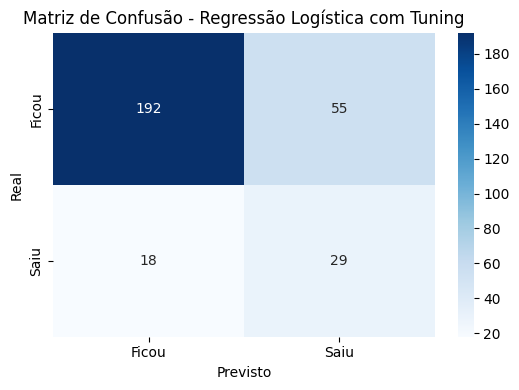

In [238]:
# criando pipeline com escalonamento
pipeline_lrt = Pipeline([('scaler', StandardScaler()),
                        ('model', LogisticRegression(max_iter=1000, class_weight='balanced'))
])

param_grid = {
    'model__C': [0.01, 0.1, 1, 10],
    'model__penalty': ['l2'],
    'model__solver': ['lbfgs', 'liblinear']
}

grid_lrt = GridSearchCV(
    estimator=pipeline_lrt, 
    param_grid=param_grid, 
    cv=5, 
    scoring='f1', 
    n_jobs=-1)

grid_lrt.fit(X_train, y_train)

print(f'Melhores parâmetros - Regressão Logística:')
print(grid_lrt.best_params_)

# avaliando modelo
y_pred_lrt = grid_lrt.predict(X_test)
print(f'Resultados do modelo: Regressão Logística')
print(classification_report(y_test, y_pred_lrt))

# matriz de confusão - regressão logística tuning
cm_lrt = confusion_matrix(y_test, grid_lrt.predict(X_test))
tn, fp, fn, tp = cm_lr.ravel()

# MATRIZ REGRESSÃO LOGÍSTICA TUNING
print(f'Regressão Logística Tuning - Matriz de Confusão:')
plt.figure(figsize=(5.5, 4))
sns.heatmap(cm_lrt, annot=True, fmt='d', cmap='Blues', xticklabels=['Ficou', 'Saiu'], yticklabels=['Ficou', 'Saiu'])
plt.title('Matriz de Confusão - Regressão Logística com Tuning')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.tight_layout()
plt.show()

**XGBoost com Tuning:**

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Melhores parâmetros - XGBoost Tuning:
{'subsample': 0.6, 'scale_pos_weight': 5, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.6}
Resultados do modelo: XGBoost Tuning
              precision    recall  f1-score   support

           0       0.90      0.85      0.87       247
           1       0.38      0.49      0.43        47

    accuracy                           0.79       294
   macro avg       0.64      0.67      0.65       294
weighted avg       0.82      0.79      0.80       294


Regressão Logística - XGBoost Tuning:


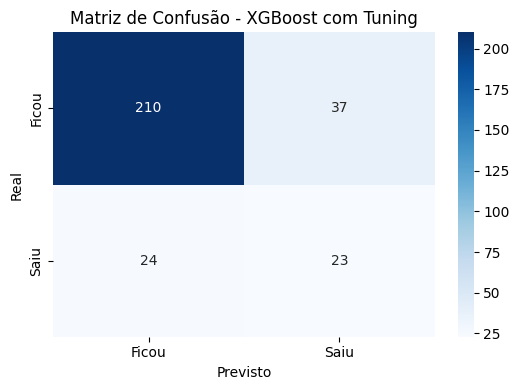

In [239]:
xgb_modelt = XGBClassifier(
    eval_metric='logloss',
    random_state=42
)

param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3,4,5,6,7],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'scale_pos_weight': [1, 2, 5, 10]
}

random_search_xgb = RandomizedSearchCV(
    estimator=xgb_modelt,
    param_distributions=param_dist,
    n_iter=30, 
    scoring='f1', 
    cv=5, 
    random_state=42, 
    n_jobs=-1,
    verbose=1
)

random_search_xgb.fit(X_train, y_train)

print('Melhores parâmetros - XGBoost Tuning:')
print(random_search_xgb.best_params_)

# avaliando modelo
y_pred_xgbt = random_search_xgb.predict(X_test)
print(f'Resultados do modelo: XGBoost Tuning')
print(classification_report(y_test, y_pred_xgbt))

# matriz de confusão - xgboost com tuning
cm_xgbt = confusion_matrix(y_test, random_search_xgb.predict(X_test))
tn, fp, fn, tp = cm_xgbt.ravel()

# MATRIZ XGBOOST COM TUNING
print(f'\nRegressão Logística - XGBoost Tuning:')
plt.figure(figsize=(5.5, 4))
sns.heatmap(cm_xgbt, annot=True, fmt='d', cmap='Blues', xticklabels=['Ficou', 'Saiu'], yticklabels=['Ficou', 'Saiu'])
plt.title('Matriz de Confusão - XGBoost com Tuning')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.tight_layout()
plt.show()

### 🔹Etapa 5 – Avaliação dos modelos

- Avaliar os erros (falsos positivos e falsos negativos) e o impacto para o negócio

- Ver a importância das variáveis nos modelos, incluindo métodos para explicar o modelo (coeficientes na Regressão Logística e feature importance no XGBoost).

### 5.1 Resumo de comparação dos modelos

In [240]:
# resumo
print("\n🔍 Resumo de Comparação:\n")

def get_scores(name, y_test, y_pred):
    print(f"{name}")
    print(f"Accuracy : {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall   : {recall_score(y_test, y_pred):.4f}")
    print(f"F1 Score : {f1_score(y_test, y_pred):.4f}")
    print("-" * 30)

get_scores("Regressão Logística", y_test, y_pred_lr)
get_scores("Regressão Logística com Tuning", y_test, y_pred_lrt)
get_scores("XGBoost:", y_test, y_pred_xgb)
get_scores("XGBoost com Tuning:", y_test, y_pred_xgbt)


🔍 Resumo de Comparação:

Regressão Logística
Accuracy : 0.7517
Precision: 0.3452
Recall   : 0.6170
F1 Score : 0.4427
------------------------------
Regressão Logística com Tuning
Accuracy : 0.7517
Precision: 0.3452
Recall   : 0.6170
F1 Score : 0.4427
------------------------------
XGBoost:
Accuracy : 0.8537
Precision: 0.6250
Recall   : 0.2128
F1 Score : 0.3175
------------------------------
XGBoost com Tuning:
Accuracy : 0.7925
Precision: 0.3833
Recall   : 0.4894
F1 Score : 0.4299
------------------------------


### 5.2 Analisando erros e impacto no negócio:

In [244]:
tn, fp, fn, tp = cm_lrt.ravel()

print(f"• Regressão Logística com Tuning:")
print(f"Falsos Positivos (FP): {fp} → funcionários previstos para sair, mas que ficaram")
print(f"Falsos Negativos (FN): {fn} → funcionários previstos para ficar, mas que saíram")

# Impacto:
print("\nImpacto dos erros para o negócio:")
print(f"- FP: pode gerar custos desnecessários com retenção.")
print(f"- FN: perda real, pois o funcionário sai sem ação preventiva.")

tn, fp, fn, tp = cm_xgb.ravel()
print(f"\n• XGBoost:")
print(f"Falsos Positivos (FP): {fp}")
print(f"Falsos Negativos (FN): {fn}")

print("\nImpacto dos erros para o negócio:")
print(f"- FP: custo com ações em funcionários que não sairão.")
print(f"- FN: perda de funcionários sem alerta.")

• Regressão Logística com Tuning:
Falsos Positivos (FP): 55 → funcionários previstos para sair, mas que ficaram
Falsos Negativos (FN): 18 → funcionários previstos para ficar, mas que saíram

Impacto dos erros para o negócio:
- FP: pode gerar custos desnecessários com retenção.
- FN: perda real, pois o funcionário sai sem ação preventiva.

• XGBoost:
Falsos Positivos (FP): 6
Falsos Negativos (FN): 37

Impacto dos erros para o negócio:
- FP: custo com ações em funcionários que não sairão.
- FN: perda de funcionários sem alerta.


### 5.3 Verificando a importância das variáveis:

**Regressão Logística com Tuning (coeficientes):**

In [245]:
# extraindo coeficientes do melhor modelo
coef = grid_lrt.best_estimator_.named_steps['model'].coef_[0]
features = X.columns

coef_df = pd.DataFrame({'feature' : features, 'coef' : coef})
coef_df['abs_coef'] = coef_df['coef'].abs()
coef_df = coef_df.sort_values(by='abs_coef', ascending=False)

print('Variáveis mais importantes:')
print(coef_df.head(10))

Variáveis mais importantes:
                             feature      coef  abs_coef
35     JobRole_Laboratory Technician  0.810172  0.810172
13                          OverTime  0.771095  0.771095
25  BusinessTravel_Travel_Frequently  0.722538  0.722538
18                 TotalWorkingYears -0.660270  0.660270
8                           JobLevel  0.650173  0.650173
41      JobRole_Sales Representative  0.531090  0.531090
26      BusinessTravel_Travel_Rarely  0.512780  0.512780
29      EducationField_Life Sciences -0.512319  0.512319
23           YearsSinceLastPromotion  0.499063  0.499063
28                  Department_Sales  0.470587  0.470587


Text(0, 0.5, 'feature')

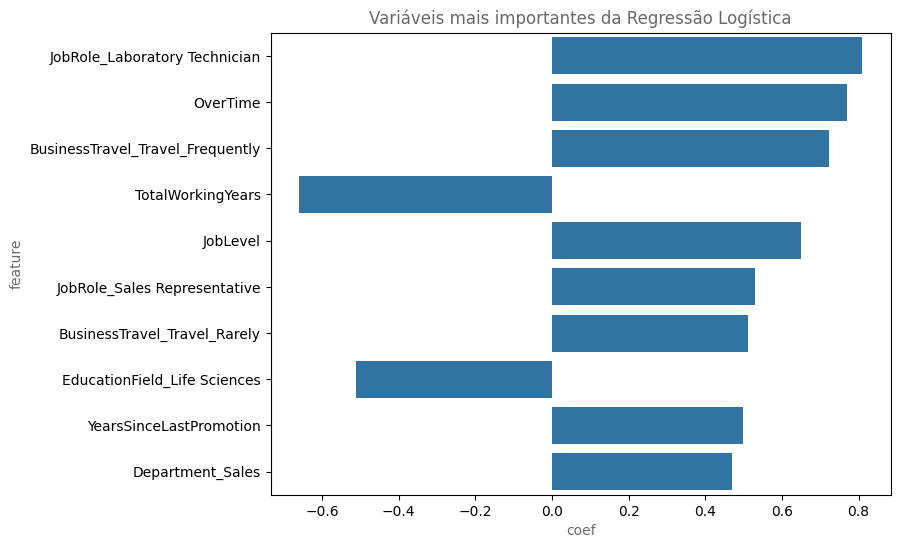

In [246]:
# visualização
plt.figure(figsize=(8,6))
sns.barplot(x='coef', y='feature', data=coef_df.head(10))
plt.title('Variáveis mais importantes da Regressão Logística', color='dimgrey')
plt.xlabel('coef', color='dimgrey')
plt.ylabel('feature', color='dimgrey')

### 6.1 Explicação com SHAP

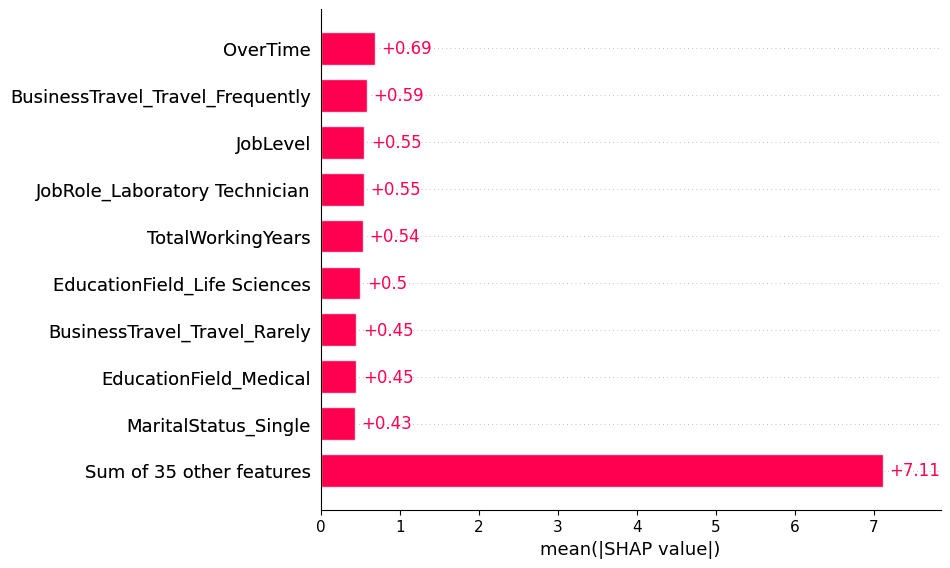

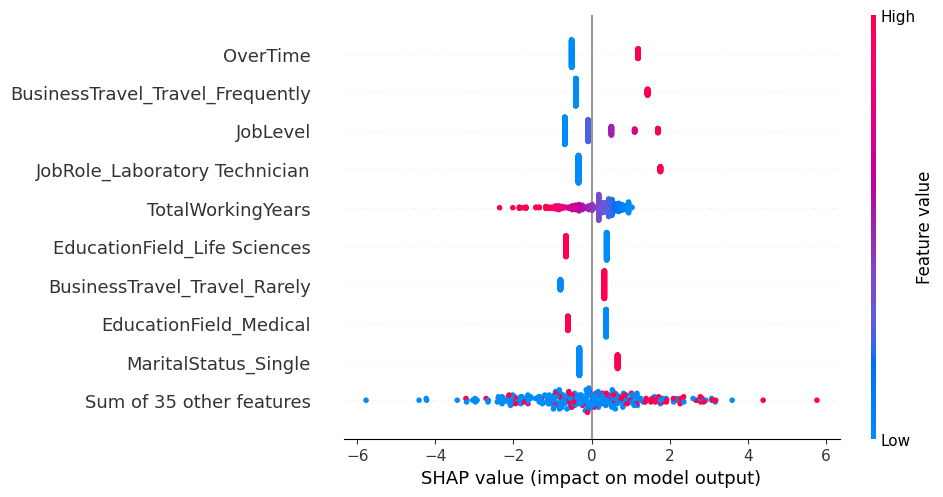

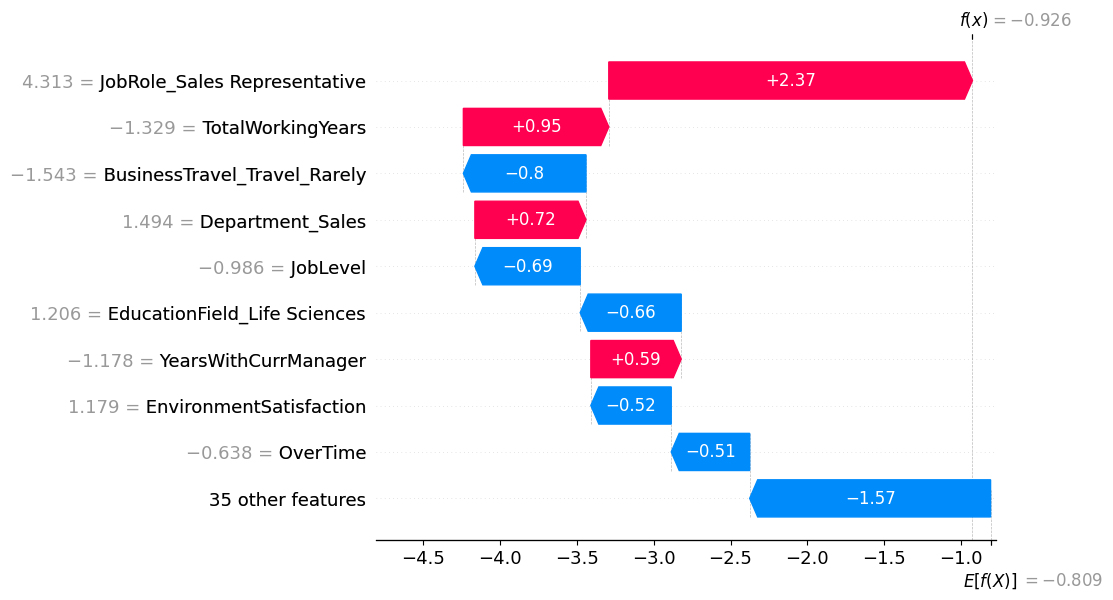

In [ ]:
# extrair o melhor modelo do GridSearchCV
final_lr_model = grid_lrt.best_estimator_

# separar o modelo e o scaler do pipeline
logreg_model = final_lr_model.named_steps['model']
scaler = final_lr_model.named_steps['scaler']

# aplicar o scaler aos dados e manter os nomes das colunas
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# inicializar o SHAP explainer
explainer = shap.Explainer(logreg_model, X_train_scaled_df)

# calcular os valores SHAP
shap_values = explainer(X_test_scaled_df)

# gráfico de barras (importância média das variáveis)
shap.plots.bar(shap_values)

# gráfico beeswarm (impacto de cada valor de cada variável)
shap.plots.beeswarm(shap_values)

# gráfico waterfall (explicação individual - 1º funcionário do teste)
shap.plots.waterfall(shap_values[0])

### 🔹Etapa 6 – Relatório/Apresentação de Resultados

**Modelos Treinados:** Regressão Logística, XGBoost

**Tuning com Hiperparâmetros:** Regressão Logística e XGBoost

**Feature Importance:** Regressão Logística

---

**Modelo Recomendado:** 

- ✅ **Regressão Logística:** Melhor modelo para a predição da classe minoritária (quem sai), com maior recall. Para ações mais agressivas de retenção.

- **XGBoost:** Para visão mais conservadora, com menos falsos alarmes. Alta precisão, mas baixo recall.

### Pontos de atenção para o RH

- **Fatores com maior risco de saída:**

        - OverTime: maior fator de saída

        - Solteiros: podem estar mais disponíveis para trocar de emprego

        - Cargos como Vendas e Técnico de Lab: têm rotatividade naturalmente alta

        - Viagens frequentes: podem gerar desgaste

- **Fatores com maior chance de retenção:**

        - Mais anos de experiência

        - Salário mais alto

        - Maior tempo no mesmo cargo

        - Idade mais elevada

        - Cargo mais alto

### 📌 Recomendações ao RH

- **Ações de retenção para perfis com maior risco:**

        - Reduzir carga de horas extras: oferecer compensações ou limites

        - Mapear sobrecarga de viagens: revezamento de viagens ou bônus compensatório

        - Treinamentos e plano de carreira para cargos com alta saída (vendas e técnico)

        - Oferecer estabilidade e engajamento para funcionários mais jovens e solteiros

- **Valorização de perfis com tendência à permanência:**

        - Investir em planos de carreira para seniores e mais funcionários mais experientes

        - Reconhecimento para funcionários com muitos anos de casa

        - Revisão salarial periódica, principalmente para os funcionários de nível mais baixo